In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='../../../Data/d2s_annotations_v1.1'
dataType='D2S_training'
annFile='{}/annotations/{}.json'.format(dataDir,dataType)

In [3]:
# initialize D2S api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!


In [4]:
# display D2S categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(', '.join(nms)))

COCO categories: 
gepa_bio_und_fair_fencheltee, gepa_bio_und_fair_kraeuterteemischung, gepa_bio_und_fair_kamillentee, ethiquable_gruener_tee_ceylon, gepa_bio_und_fair_pfefferminztee, gepa_bio_und_fair_rooibostee, kilimanjaro_tea_earl_grey, koelln_muesli_fruechte, koelln_muesli_schoko, dr_oetker_vitalis_knuspermuesli_klassisch, corny_nussvoll, corny_schoko_banane, pelikan_tintenpatrone_canon, lettuce, carrot, cucumber, zucchini, apple_golden_delicious, apple_granny_smith, apple_red_boskoop, orange_single, clementine_single, avocado, banana_bundle, banana_single, kiwi, pear, franken_tafelreiniger, suntory_gokuri_lemonade, pasta_reggia_elicoidali, pasta_reggia_fusilli, pasta_reggia_spaghetti, caona_cocoa, cafe_wunderbar_espresso, gepa_italienischer_bio_espresso, douwe_egberts_professional_ground_coffee, corny_nussvoll_single, corny_schoko_banane_single, gepa_bio_caffe_crema, cocoba_cocoa, grapes_green_sugraone_seedless, corn_salad, rocket, grapes_sweet_celebration_seedless, oranges, cleme

In [5]:
cats

[{'supercategory': 'tea', 'id': 46, 'name': 'gepa_bio_und_fair_fencheltee'},
 {'supercategory': 'tea',
  'id': 48,
  'name': 'gepa_bio_und_fair_kraeuterteemischung'},
 {'supercategory': 'tea', 'id': 47, 'name': 'gepa_bio_und_fair_kamillentee'},
 {'supercategory': 'tea', 'id': 45, 'name': 'ethiquable_gruener_tee_ceylon'},
 {'supercategory': 'tea',
  'id': 49,
  'name': 'gepa_bio_und_fair_pfefferminztee'},
 {'supercategory': 'tea', 'id': 50, 'name': 'gepa_bio_und_fair_rooibostee'},
 {'supercategory': 'tea', 'id': 51, 'name': 'kilimanjaro_tea_earl_grey'},
 {'supercategory': 'cereals', 'id': 17, 'name': 'koelln_muesli_fruechte'},
 {'supercategory': 'cereals', 'id': 18, 'name': 'koelln_muesli_schoko'},
 {'supercategory': 'cereals',
  'id': 16,
  'name': 'dr_oetker_vitalis_knuspermuesli_klassisch'},
 {'supercategory': 'packaged cereal bars', 'id': 12, 'name': 'corny_nussvoll'},
 {'supercategory': 'packaged cereal bars',
  'id': 14,
  'name': 'corny_schoko_banane'},
 {'supercategory': 'ink ca

In [6]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['roma_vine_tomatoes']);
imgIds = coco.getImgIds(catIds=catIds );


In [12]:
imgIds

[14806]

In [11]:
len(imgIds)

1

In [8]:
imgIds = coco.getImgIds(imgIds = [14806])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

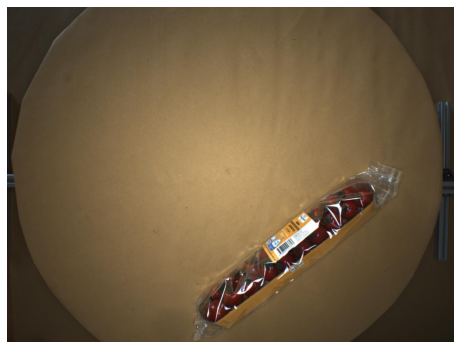

In [9]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread('../../../Data/images/%s'%(img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

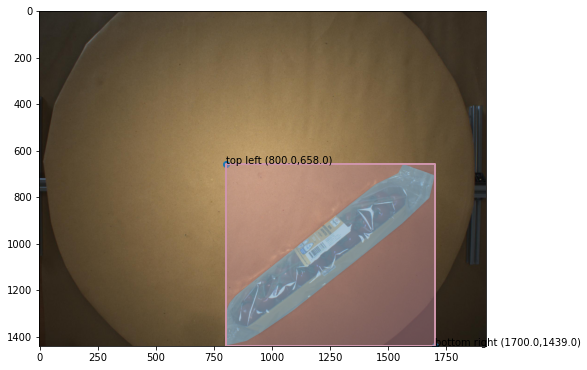

In [18]:
plt.imshow(I); plt.axis('on')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
plt.scatter([anns[0]["bbox"][0], anns[0]["bbox"][0] + anns[0]["bbox"][2]],[anns[0]["bbox"][1], anns[0]["bbox"][1] + anns[0]["bbox"][3]])
plt.annotate("top left ({},{})".format(anns[0]["bbox"][0], anns[0]["bbox"][1]), (anns[0]["bbox"][0], anns[0]["bbox"][1]))
plt.annotate("bottom right ({},{})".format(anns[0]["bbox"][0] + anns[0]["bbox"][2] , anns[0]["bbox"][1] + anns[0]["bbox"][3]), (anns[0]["bbox"][0] + anns[0]["bbox"][2] , anns[0]["bbox"][1] + anns[0]["bbox"][3]))
coco.showAnns(anns,draw_bbox=True )

In [16]:
anns

[{'segmentation': {'counts': 'i\\VS16^\\1<D<YL\\OfjNo0YU1CkiNi0SV1IQiNc0lV10XhN<fW1_2N3N2N2M2O2N2M3N2M2O2N2N2O001N2O1O001O1O1N2O001O1O1O0O2O1O1O001O1N2O1O001O1O1O010O1O1O001O1O100O001O1O1O00100O1O001O1O100O001O1O1O00100O1O001O1O1O10O01O1O1O00100O1O001O10O01O001O01O01O001O010O000010O01O000010O01O001O01O01O001O01O01O001O010O00001O010O00001O010O001O00010O001O01O01O001O010O00001O01O01O000010O0001O0001O01O000010O0001O00010O000010O0001O00010O00000010O0001O00010O00001O01O01O000010O0001O0001O01O000010O0001O01O01O000010O0001O00010O00000010O0001O00010O00001O01O01O000010O0001O0001O01O00010O00001O01O01O000010O0001O00010O00000010O0001O00010O00000010O00000010O00000010O000000010O000000010O000000010O000001O01O000001O01O000001O01O0000010O000000010O000001O01O000001O01O000001O01O000001O01O0001O0001O0001O0001O0001O01O000001O01O0001O0001O0001O0001O0001O0001O0001O0001O0001O0001O01O0001O0001O0001O0001O0001O0001O0001O01O000001O01O000001O01O000001O01O0000010O000001O01O000001O01O000001O01O000001O01O0000010O0000